In [76]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline

#models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.tree import plot_tree

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import roc_auc_score

In [4]:
df = pd.read_csv("heart.csv")

Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic

trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [ ]:
df.isnull().sum()
df["thall"].unique() #TODO drop thall maybe

array([1, 2, 3, 0], dtype=int64)

Mivel az adathalamzunk numerikus adatokat tartalmaz, és nincsenek hiányzó adatok ezért folytathatjuk a vizsgálatot feature selectionnel.<br>
Ha lenne kategorikus adatunk akkor arra az oszlopra LabelEncodert kellene alkalmazni.<br>
Amennyiben hiányzó adatok lennének, úgy lehetne forward/backwardfillel, oszlopátlag alapján számítást végezni. Mivel csak 303 adatunk van, nem érdemes oszlopot törölni.

In [95]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Adatok eloszlása

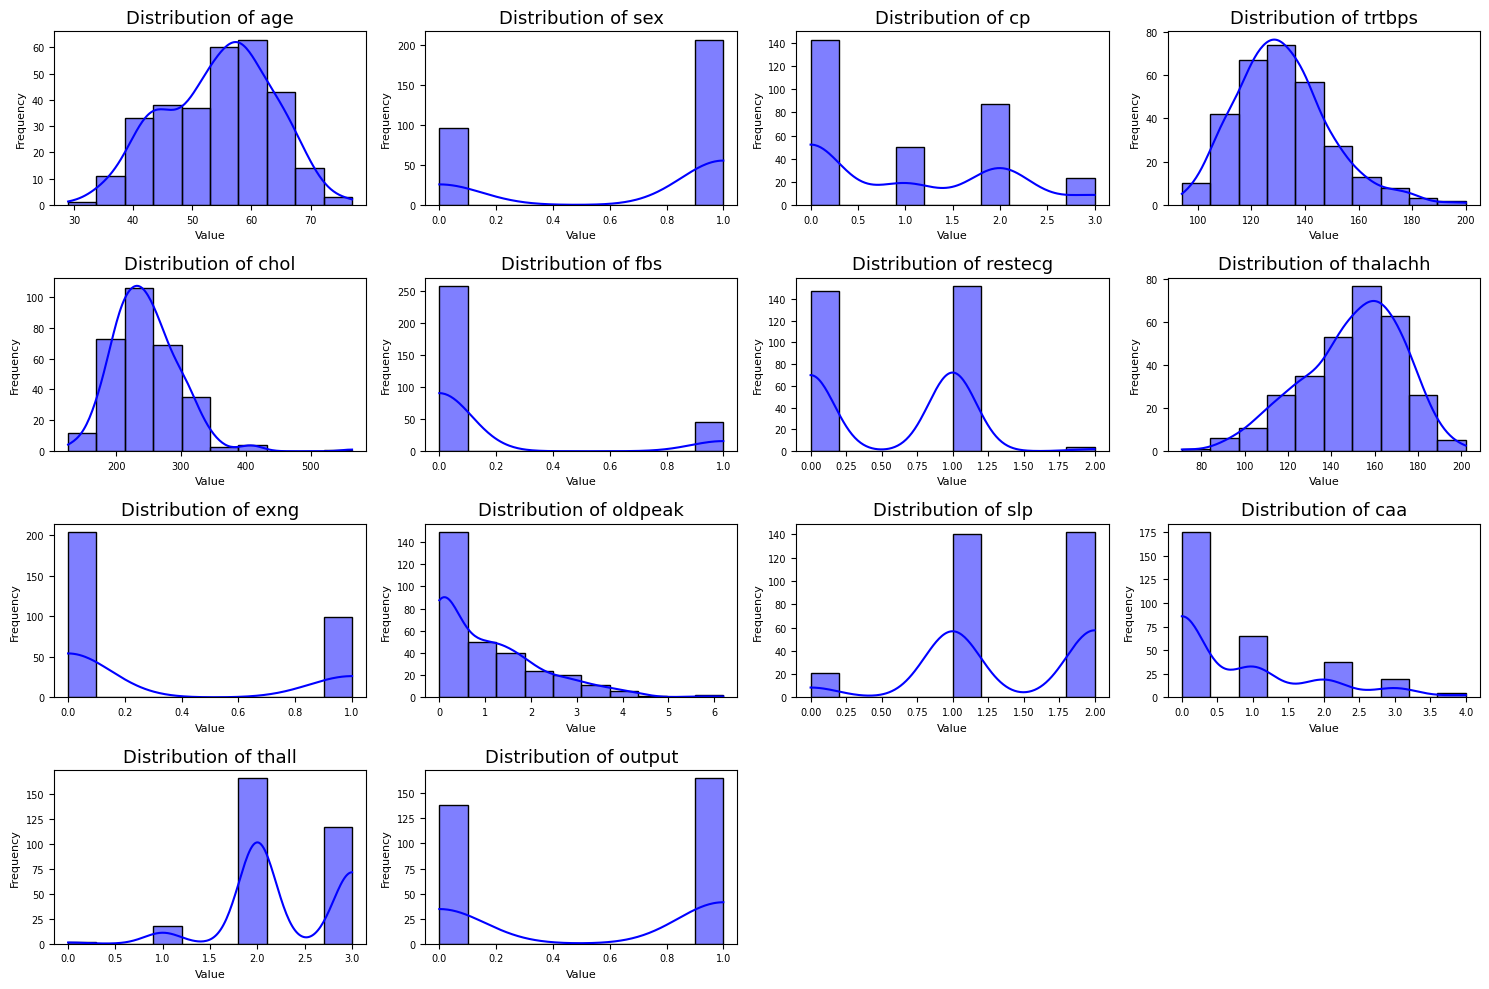

In [59]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True, color="blue", edgecolor="black", bins=10)
    plt.title(f"Distribution of {col}", fontsize=13)
    plt.xlabel("Value", fontsize=8)
    plt.ylabel("Frequency", fontsize=8)
    plt.tick_params(axis='x', labelsize=7)
    plt.tick_params(axis='y', labelsize=7)

plt.tight_layout()
plt.show()

### Férfi és női halálesetek 

C:\Users\Asus\AppData\Local\Temp\ipykernel_4128\1940322762.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=values, palette=['blue', 'red'], ax=axes[1])


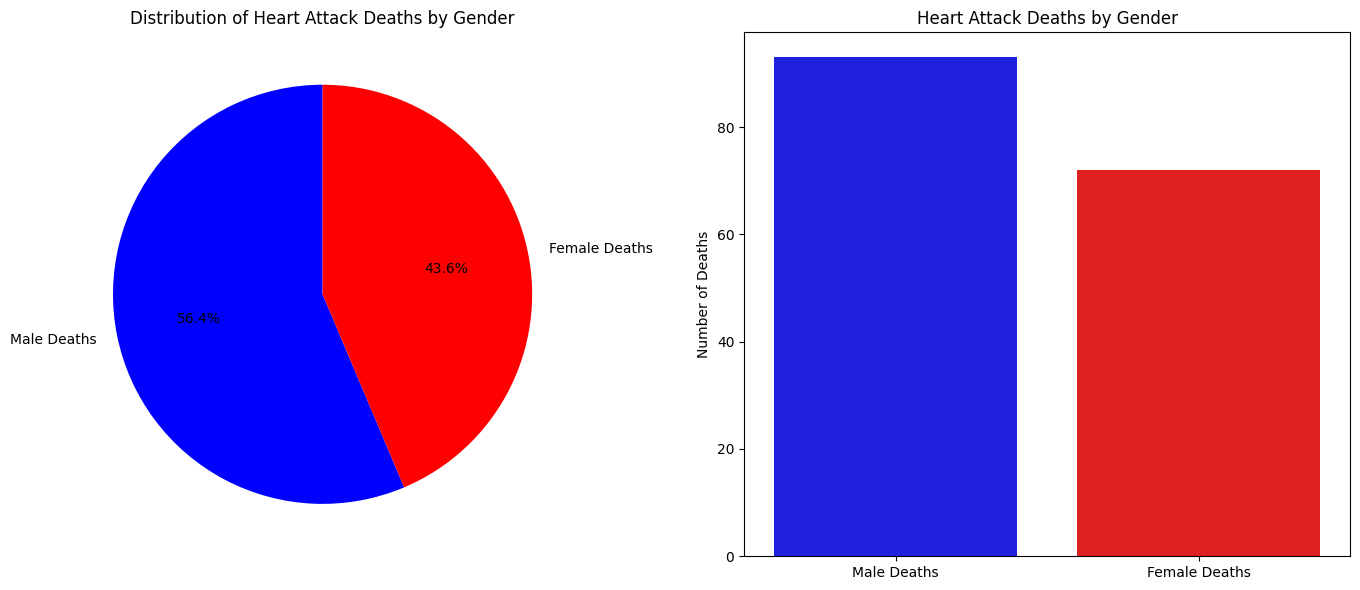

In [57]:

gender_death_counts = df[df['output'] == 1]['sex'].value_counts()

# Prepare labels and values for the charts
labels = ['Male Deaths', 'Female Deaths']
values = [gender_death_counts.get(1, 0), gender_death_counts.get(0, 0)]

# Create a figure with 1 row and 2 columns for side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the pie chart on the first subplot
axes[0].pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])
axes[0].set_title("Distribution of Heart Attack Deaths by Gender")

# Plot the bar chart on the second subplot
sns.barplot(x=labels, y=values, palette=['blue', 'red'], ax=axes[1])
axes[1].set_ylabel("Number of Deaths")
axes[1].set_title("Heart Attack Deaths by Gender")

plt.tight_layout()
plt.show()



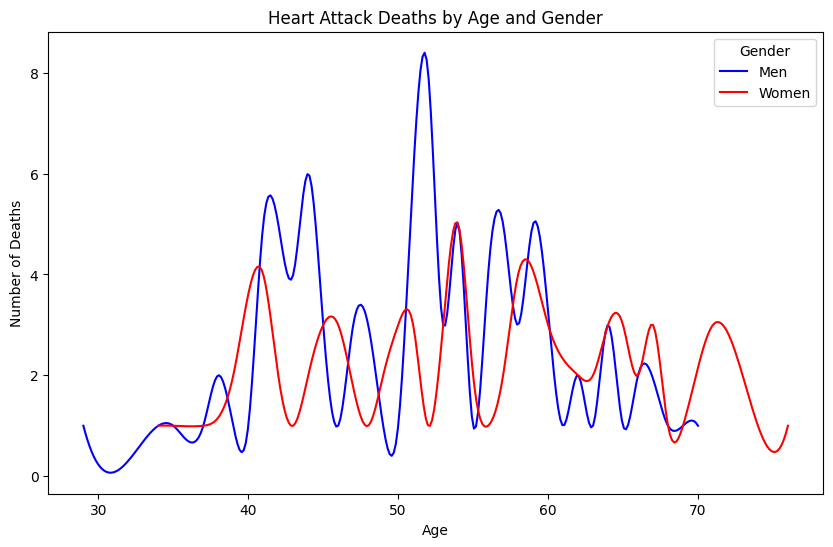

In [ ]:
df_deaths = df[df['output'] == 1] # death
df_deaths = df_deaths.groupby(['age', 'sex']).size().reset_index(name='deaths')

x_men = df_deaths[df_deaths['sex'] == 1]['age']
y_men = df_deaths[df_deaths['sex'] == 1]['deaths']
x_women = df_deaths[df_deaths['sex'] == 0]['age']
y_women = df_deaths[df_deaths['sex'] == 0]['deaths']

x_men_smooth = np.linspace(x_men.min(), x_men.max(), 300)
x_women_smooth = np.linspace(x_women.min(), x_women.max(), 300)

y_men_smooth = make_interp_spline(x_men, y_men)(x_men_smooth)
y_women_smooth = make_interp_spline(x_women, y_women)(x_women_smooth)

plt.figure(figsize=(10, 6))
sns.lineplot(x=x_men_smooth, y=y_men_smooth, color='blue', label='Men')
sns.lineplot(x=x_women_smooth, y=y_women_smooth, color='red', label='Women')

plt.title("Heart Attack Deaths by Age and Gender")
plt.xlabel("Age")
plt.ylabel("Number of Deaths")
plt.legend(title="Gender")
plt.show()


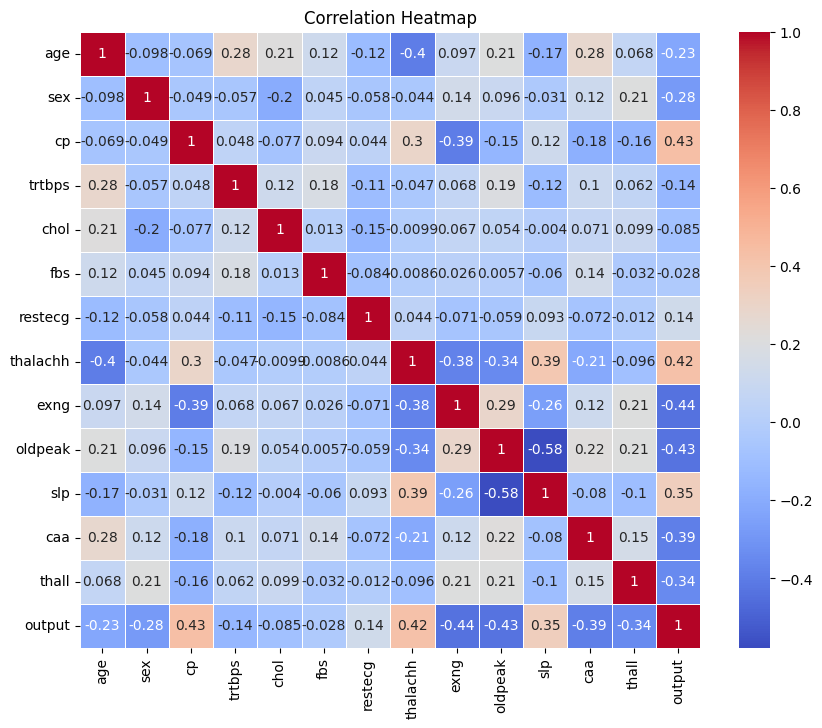

In [60]:
corr_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5) # 0 semennyi korrelacio, +1 korellal
plt.title('Correlation Heatmap')
plt.show()

In [61]:
X = df.drop("output", axis=1)
Y = df["output"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=32)

In [77]:
models_params = {
    "KNeighborsClassifier": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7, 9, 11]
        }
    },
    "RandomForestClassifier": {
        "model": RandomForestClassifier(),
        "params": {
            "n_estimators": [10, 50, 100, 200],
            "max_depth": [None, 5, 10, 15, 20]
        }
    },
    "DecisionTreeClassifier": {
        "model": DecisionTreeClassifier(),
        "params": {
            "max_depth": [None, 5, 10, 15, 20]
        }
    },
    "SVC": {
        "model": SVC(probability=True),
        "params": {
            "C": [0.1, 1, 10, 100],
            "gamma": ["scale", "auto"],
        }
    },
    "LogisticRegression": {
        "model": LogisticRegression(),
        "params": {
            "C": [0.1, 1, 10, 100]
        }
    }
}

In [79]:
best_model = None
best_params = None
best_score = 0

best_conf_mx = None
best_roc_auc = None
best_class_report = None
best_opt_threshold = None

# Grid search for the best model and parameters
for model_name, mp in models_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_jobs=-1)
    clf.fit(X_train, y_train)
    
    # Train the model with the training set
    model = clf.best_estimator_
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate and print the metrics
    conf_mx = confusion_matrix(y_test, y_pred, labels=[1, 0]) # 1 positive, 0 negative
    class_report = classification_report(y_test, y_pred, target_names=['live', 'die'])
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    optimal_idx = np.argmax(tpr - fpr)
    opt_threshold = thresholds[optimal_idx]

    print("Model Name:", model_name)
    print("Model Best Params:", clf.best_params_)
    print("Accuracy:", clf.best_score_)
    print("Confusion Matrix:\n", conf_mx)
    print(class_report)
    print('ROC AUC:', roc_auc)
    print("Optimal Threshold:", opt_threshold)
    print("--------------------------------------")
    
    if clf.best_score_ > best_score:
        best_score = clf.best_score_
        best_model = model_name
        best_params = clf.best_params_
        best_conf_mx = conf_mx
        best_class_report = class_report
        best_roc_auc = roc_auc
        best_opt_threshold = opt_threshold

print("Best Model:", best_model)
print("Best score:", best_score)
print("Best Parameters:", best_params)
print("Confusion Matrix:\n", best_conf_mx)
print(best_class_report)
print('ROC AUC:', best_roc_auc)
print("Optimal Threshold:", best_opt_threshold)

Model Name: KNeighborsClassifier
Model Best Params: {'n_neighbors': 7}
Accuracy: 0.6272425249169435
Confusion Matrix:
 [[40  7]
 [21 23]]
              precision    recall  f1-score   support

        live       0.77      0.52      0.62        44
         die       0.66      0.85      0.74        47

    accuracy                           0.69        91
   macro avg       0.71      0.69      0.68        91
weighted avg       0.71      0.69      0.68        91

ROC AUC: 0.7497582205029014
Optimal Threshold: 0.5714285714285714
--------------------------------------
Model Name: RandomForestClassifier
Model Best Params: {'max_depth': 15, 'n_estimators': 50}
Accuracy: 0.8302325581395349
Confusion Matrix:
 [[41  6]
 [10 34]]
              precision    recall  f1-score   support

        live       0.85      0.77      0.81        44
         die       0.80      0.87      0.84        47

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import AUC

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')

# Define features and target
X = df.drop('output', axis=1)
y = df['output']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network
model = Sequential()

# Input layer (implicitly handled by the first Dense layer)
# Hidden layer 1: 16 neurons, ReLU activation
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
# Hidden layer 2: 8 neurons, ReLU activation
model.add(Dense(8, activation='relu'))
# Output layer: 1 neuron, Sigmoid activation
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss=BinaryCrossentropy(), 
              metrics=['accuracy', AUC()])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=10, validation_split=0.2)

# Evaluate the model
loss, accuracy, auc = model.evaluate(X_test, y_test)
print(history.history.keys())
print(f'Test AUC: {auc}')
print(f'Test Accuracy: {accuracy}')

plt.plot(history.history['auc_7'], label='Train AUC')
plt.plot(history.history['val_auc_7'], label='Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()

Epoch 1/50


c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4624 - auc_7: 0.5279 - loss: 0.7944 - val_accuracy: 0.4286 - val_auc_7: 0.8112 - val_loss: 0.7122
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4518 - auc_7: 0.6983 - loss: 0.7241 - val_accuracy: 0.4490 - val_auc_7: 0.8537 - val_loss: 0.6736
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4840 - auc_7: 0.7445 - loss: 0.6681 - val_accuracy: 0.4490 - val_auc_7: 0.8784 - val_loss: 0.6443
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4552 - auc_7: 0.8246 - loss: 0.6656 - val_accuracy: 0.5714 - val_auc_7: 0.8997 - val_loss: 0.6196
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5968 - auc_7: 0.7995 - loss: 0.6268 - val_accuracy: 0.6122 - val_auc_7: 0.8980 - val_loss: 0.5982
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6604 - auc_7: 0.8506 - loss: 0.6081 - val_accuracy: 0.6735 - val_auc_7: 0.8861 - val_loss: 0.5778
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 

KeyError: 'auc_1'

In [84]:
print(history.history.keys())

dict_keys(['auc_1', 'loss', 'val_auc_1', 'val_loss'])


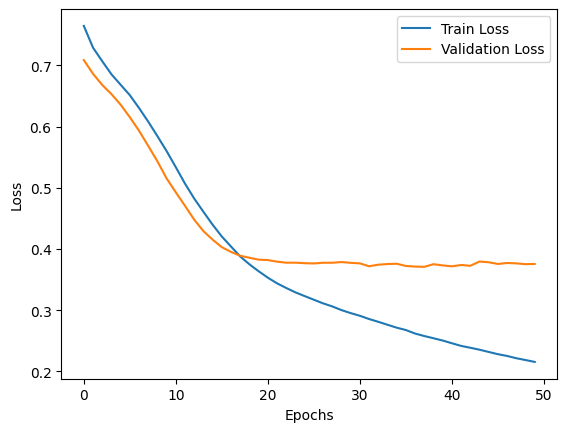

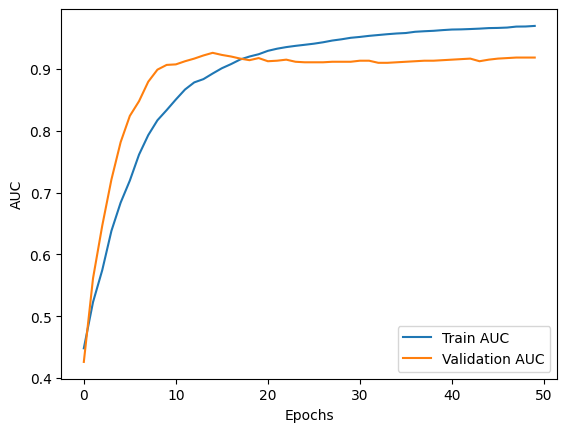

In [85]:
import matplotlib.pyplot as plt

# Plot the loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the AUC
plt.plot(history.history['auc_1'], label='Train AUC')
plt.plot(history.history['val_auc_1'], label='Validation AUC')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion Matrix:
 [[25  4]
 [ 7 25]]
Classification Report:
                  precision    recall  f1-score   support

No Heart Attack       0.78      0.86      0.82        29
   Heart Attack       0.86      0.78      0.82        32

       accuracy                           0.82        61
      macro avg       0.82      0.82      0.82        61
   weighted avg       0.82      0.82      0.82        61

ROC AUC: 0.8857758620689655


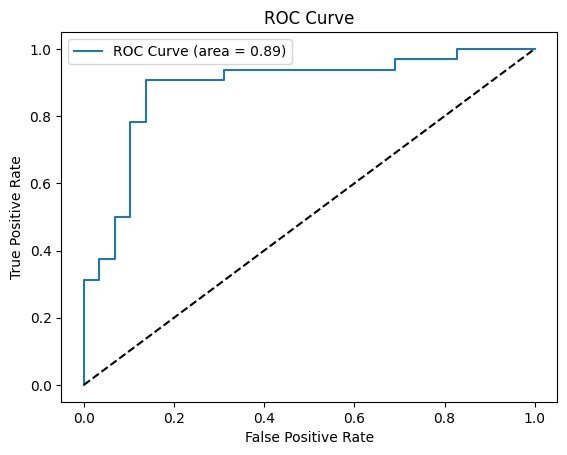

In [86]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

# Make predictions
y_pred = model.predict(X_test).round()
y_pred_proba = model.predict(X_test)

# Confusion Matrix
conf_mx = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_mx)

# Classification Report
class_report = classification_report(y_test, y_pred, target_names=['No Heart Attack', 'Heart Attack'])
print("Classification Report:\n", class_report)

# ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

# Plot ROC Curve
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()


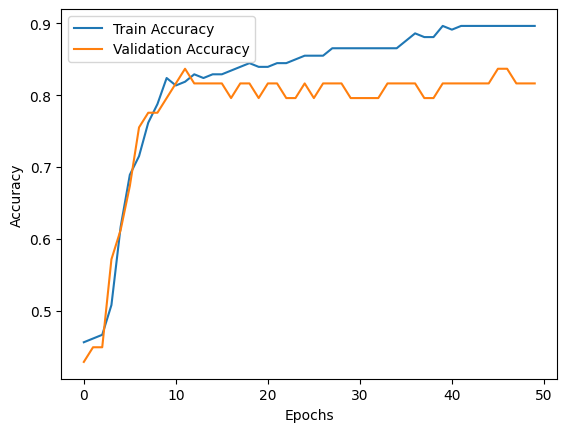

In [93]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()